<a href="https://colab.research.google.com/github/Nishantthakurrr/Text-Data-Analysis-Youtube/blob/main/Youtube_Text_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

####Questions:-
1. How to read .csv file using Pandas?
2. How to do setiment analysis of comments on YouTube?
3. How to perform Wordcloud Analysis?
4. How to do emoji analysis?
5. How to export Data in csv or other formats?
6. Which category has the most likes?



In [2]:
# Reading the CSV file.

q = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRop58HlgnO4TIKPA5T0y00ipAkcyqzsMzEXyecdQp354YWwp0mHvWB77mX0ymWK2e320zWtpd4YFPK/pub?output=csv')
q.head(11)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0


In [3]:
# I want to check about some missing values in the Data Set
q.isnull().sum() # The sum of the null values are 30 in the comment column.

video_id        0
comment_text    1
likes           0
replies         0
dtype: int64

In [4]:
# Let's drop the null values
q.dropna(inplace=True)

In [5]:
q.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [6]:
q.shape

(2999, 4)

In [7]:
q.shape

(2999, 4)

### Now we will do the Sentiment Analysis of the data.

In [8]:
!pip install textblob # istall TextBlob

In [9]:
from textblob import TextBlob  #import Textblob for sentiment analyis

In [10]:
q["comment_text"]

0                       Logan Paul it's yo big day ‼️‼️‼️
1       I've been following you from the start of your...
2                      Say hi to Kong and maverick for me
3                                     MY FAN . attendance
4                                              trending 😉
                              ...                        
2995                 Es muy bueno!!!!!!!!! Se pasan !!!!!
2996                                 Volviendo a los 90's
2997                              Italiani dai ci siete ?
2998    Hey I hope you enjoy this new video! Some 370 ...
2999                             What do the 7s refer to?
Name: comment_text, Length: 2999, dtype: object

In [11]:
def get_polarity(comment_text):
    return TextBlob(comment_text).polarity

# Apply function to the comment_data column
q['polarity'] = q['comment_text'].apply(get_polarity)

In [12]:
q["polarity"]=q["polarity"].round(2)

In [13]:
# Below are all unique values in the polarity column

q["polarity"].unique()

array([ 0.  ,  0.8 , -0.14,  0.2 , -0.02,  0.5 , -0.29,  0.25, -0.8 ,
        0.65,  0.38, -0.05,  0.34,  0.6 , -0.31,  0.29, -0.36,  0.01,
        0.12,  0.17, -0.4 , -0.12, -0.07,  0.41,  0.35, -0.03, -0.1 ,
        0.4 ,  0.75, -0.16,  0.07,  1.  ,  0.61,  0.67,  0.45, -0.2 ,
        0.7 , -0.5 ,  0.88,  0.46,  0.04,  0.05, -0.45,  0.22, -0.35,
        0.03,  0.06,  0.32,  0.1 , -0.11, -0.08,  0.02, -0.78, -0.26,
        0.16,  0.23, -0.13,  0.18, -0.6 , -0.15,  0.27,  0.47,  0.33,
        0.52,  0.3 ,  0.15, -0.06, -0.19,  0.24,  0.11, -0.34,  0.42,
       -0.28,  0.62,  0.9 , -0.3 ,  0.57, -0.25,  0.19,  0.09,  0.63,
       -0.23,  0.37,  0.56,  0.14,  0.85,  0.59,  0.44,  0.13, -0.27,
       -0.55, -1.  , -0.17, -0.75,  0.08,  0.39, -0.42, -0.18, -0.33,
        0.43, -0.01,  0.31,  0.55,  0.28,  0.48, -0.48,  0.51, -0.47,
        0.49,  0.78,  0.36, -0.62, -0.87,  0.21, -0.24, -0.53, -0.04,
       -0.32, -0.38,  0.58, -0.89, -0.65, -0.7 , -0.93, -0.09,  0.26,
        0.53,  0.64,

<Axes: title={'center': 'Polarity Distribution'}, ylabel='Frequency'>

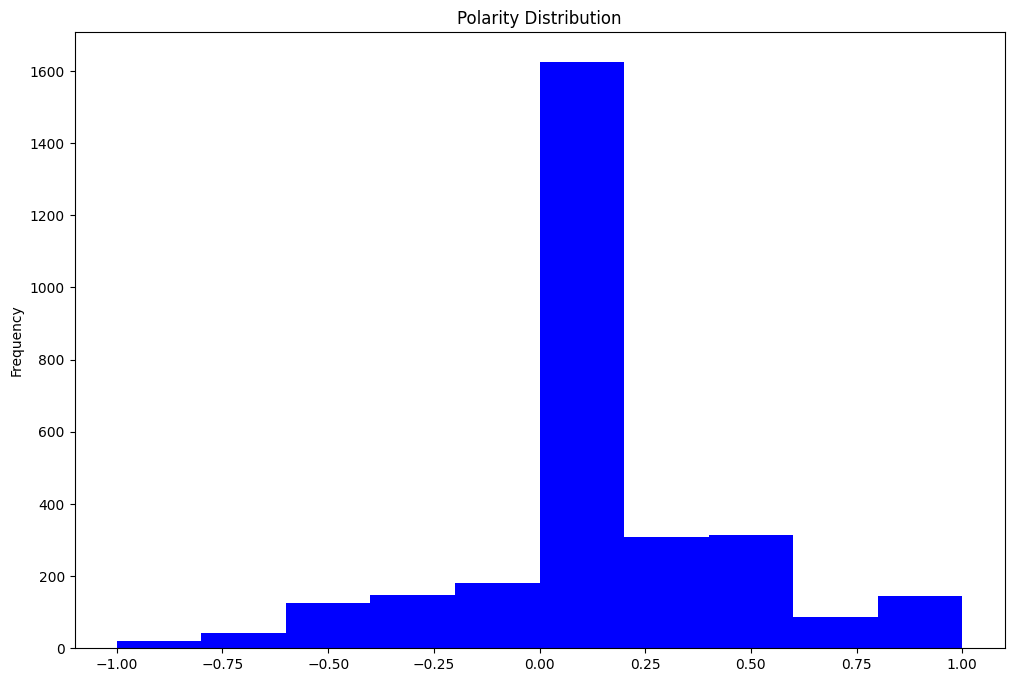

In [14]:
# Plotting the the polarity distribution on the Histrogram

q["polarity"].plot(figsize=(12,8),title="Polarity Distribution",color="blue",kind="hist")


In [15]:
#Worldcloud Analysis

In [16]:
# Firstly we have tpo creat a filter
filter = q["polarity"] ==1.0


In [17]:
positive_comments= q[filter]

positive_comments

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
2928,QBGaO89cBMI,This is the best elevator music I've listened to,0,0,1.0
2951,QBGaO89cBMI,I never thought I'd say that but this is the b...,1,0,1.0
2971,QBGaO89cBMI,Geniaal <3,0,0,1.0
2980,QBGaO89cBMI,2:42 Thom the bastard :D,0,0,1.0


In [18]:
#Creating a filter for Negative comments

filter1=q["polarity"]==-1.0

Negative_comments=q[filter1]

In [19]:
Negative_comments

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
684,_HTXMhKWqnA,Yay! Another stupidly overpriced iPhone!,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0
1932,-Ifnaxi2LQg,this is the worst thing i've heard. ever.,0,0,-1.0
2043,B7YaMkCl3XA,Economy is horrible in Cuba. It's going to be ...,0,0,-1.0
2088,B7YaMkCl3XA,Sub to me if this is terrible,0,1,-1.0
2192,5ywKal6-anc,PATHETIC,1,0,-1.0


In [20]:
!pip install wordcloud

In [21]:
from wordcloud import WordCloud , STOPWORDS # Stopwords refers to the meaningless words in the sentence

In [22]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [23]:
positive_comments

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
2928,QBGaO89cBMI,This is the best elevator music I've listened to,0,0,1.0
2951,QBGaO89cBMI,I never thought I'd say that but this is the b...,1,0,1.0
2971,QBGaO89cBMI,Geniaal <3,0,0,1.0
2980,QBGaO89cBMI,2:42 Thom the bastard :D,0,0,1.0


In [24]:
# Joining all the positive comments togeather for better understanding

PC=" ".join(positive_comments["comment_text"])

In [25]:
# Initiating the for WordCloud
WC=WordCloud(stopwords=STOPWORDS).generate(PC)

(-0.5, 399.5, 199.5, -0.5)

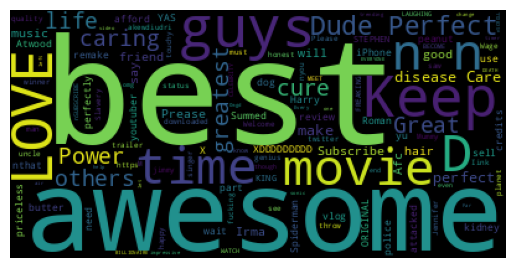

In [26]:
# Showing the WordCloud chart
plt.imshow(WC)
plt.axis("off")

In [27]:
# WordCloud graph for Negative Comments

NC=" ".join(Negative_comments["comment_text"])



In [28]:
WCN=WordCloud(stopwords=STOPWORDS).generate(NC)

(-0.5, 399.5, 199.5, -0.5)

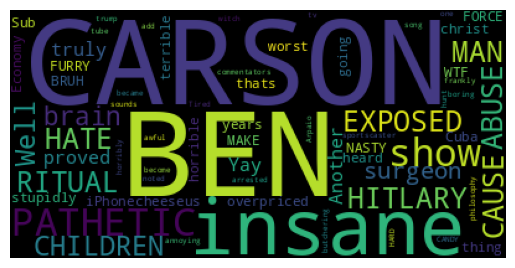

In [29]:
#Negative comments analysis
plt.imshow(WCN)
plt.axis("off")

In [30]:
!pip install emoji==2.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234910 sha256=4c9eb15dcb0cbf0b0a13b81094e0ad0d7f74182300a7a6a393afea440a3bd0e6
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [31]:
import emoji


In [32]:
emoji.__version__

'2.2.0'

In [33]:
# Importing big data for Emoji Analysis

Emoji_comments=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vR1OG_vxx1g_YW4cWrpINohXHePBgkU8CLqVHXVajKLN1UJSlK-iuXSE29-MihB1iJOg7uYPthW57Qg/pub?output=csv")

<ipython-input-33-c5a8b5ad5f77>:3: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  Emoji_comments=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vR1OG_vxx1g_YW4cWrpINohXHePBgkU8CLqVHXVajKLN1UJSlK-iuXSE29-MihB1iJOg7uYPthW57Qg/pub?output=csv")


In [34]:
Emoji_comments.head(21)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0


In [35]:
Emoji_comments.shape

(691407, 4)

In [36]:
Comments_emoji=Emoji_comments["comment_text"]

In [37]:
Comments_emoji

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691402                                               Лучшая
691403    qu'est ce que j'aimerais que tu viennes à Roan...
691404                            Ven a mexico! 😍 te amo LP
691405                                      Islığı yeter...
691406    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691407, dtype: object

In [38]:
Emoji = [char for char in Comments_emoji if char in emoji.EMOJI_DATA] # Extracting the Emoki Data
Emoji

['👍',
 '❤️',
 '😂',
 '❤️',
 '💄',
 '🖤',
 '💕',
 '😒',
 '👎🏽',
 '🐘',
 '💕',
 '😎',
 '🇺🇸',
 '🙏',
 '🇺🇸',
 '🇺🇸',
 '🌞',
 '💜',
 '😱',
 '💕',
 '🎈',
 '👍',
 '😕',
 '😻',
 '💄',
 '💦',
 '❤️',
 '❤',
 '😅',
 '💜',
 '🤴🏻',
 '😍',
 '💯',
 '❤',
 '😑',
 '💖',
 '❤',
 '🙏🏽',
 '♥️',
 '😂',
 '❤️',
 '😭',
 '💛',
 '😝',
 '😍',
 '❤',
 '😍',
 '💝',
 '👌',
 '🌞',
 '✌🏻',
 '😒',
 '👎🏽',
 '😂',
 '🇺🇸',
 '🙏',
 '🇺🇸',
 '🇺🇸',
 '💜',
 '😱',
 '🎈',
 '👍',
 '😴',
 '👍',
 '👍',
 '👍',
 '❤',
 '👍',
 '🔥',
 '💯',
 '🐍',
 '🐍',
 '😍',
 '👍',
 '😂',
 '👍',
 '❤',
 '💩',
 '😍',
 '👍',
 '😍',
 '💞',
 '♥️',
 '😻',
 '♥',
 '😂',
 '😃',
 '😴',
 '👍',
 '👍',
 '👍',
 '❤',
 '👍',
 '🔥',
 '💯',
 '🐍',
 '🐍',
 '😍',
 '👍',
 '😂',
 '👍',
 '❤',
 '💩',
 '😍',
 '👍',
 '😍',
 '💞',
 '♥️',
 '😻',
 '♥',
 '😂',
 '😃',
 '👍',
 '🤘🏾',
 '👍',
 '🙄',
 '😂',
 '👍',
 '👍',
 '🎢',
 '❤️',
 '👍🏾',
 '😂',
 '😍',
 '👍',
 '❤',
 '❤',
 '👌',
 '🤢',
 '🔥',
 '❤️',
 '😍',
 '🤗',
 '😢',
 '👍',
 '🔥',
 '👑',
 '😍',
 '👍',
 '💯',
 '❤',
 '🐍',
 '🐍',
 '💞',
 '♥️',
 '😂',
 '😀',
 '👌',
 '😍',
 '👍',
 '🤦🏾\u200d♂️',
 '💋',
 '👋',
 '👍',
 '😂',
 '❤',
 '😍',
 '❤️',
 '😭',
 '😍',
 '❤️',


In [39]:
Emoji=" ".join(Emoji)
Emoji

'👍 ❤️ 😂 ❤️ 💄 🖤 💕 😒 👎🏽 🐘 💕 😎 🇺🇸 🙏 🇺🇸 🇺🇸 🌞 💜 😱 💕 🎈 👍 😕 😻 💄 💦 ❤️ ❤ 😅 💜 🤴🏻 😍 💯 ❤ 😑 💖 ❤ 🙏🏽 ♥️ 😂 ❤️ 😭 💛 😝 😍 ❤ 😍 💝 👌 🌞 ✌🏻 😒 👎🏽 😂 🇺🇸 🙏 🇺🇸 🇺🇸 💜 😱 🎈 👍 😴 👍 👍 👍 ❤ 👍 🔥 💯 🐍 🐍 😍 👍 😂 👍 ❤ 💩 😍 👍 😍 💞 ♥️ 😻 ♥ 😂 😃 😴 👍 👍 👍 ❤ 👍 🔥 💯 🐍 🐍 😍 👍 😂 👍 ❤ 💩 😍 👍 😍 💞 ♥️ 😻 ♥ 😂 😃 👍 🤘🏾 👍 🙄 😂 👍 👍 🎢 ❤️ 👍🏾 😂 😍 👍 ❤ ❤ 👌 🤢 🔥 ❤️ 😍 🤗 😢 👍 🔥 👑 😍 👍 💯 ❤ 🐍 🐍 💞 ♥️ 😂 😀 👌 😍 👍 🤦🏾\u200d♂️ 💋 👋 👍 😂 ❤ 😍 ❤️ 😭 😍 ❤️ ❤ 💚 ♥ 👍 🖤 💚 ❤️ 💿 ❤️ 🥀 👁 😀 😂 👍 🇩🇴 ❤ ❣️ 🔥 🔥 👑 ❤ ❤ 💛 👌🏾 🤢 👍 💚 😍 ❤️ 🔥 😢 ❤ 👍 💯 💖 💞 ♥️ 🐍 🐍 👍 😇 ❤️ ❤️ 👍 🙌 😄 💕 ❤ 👍 😎 😛 💋 💯 ✌ ❤ 👍 👌 😱 💖 👍 😂 😂 ❤ ❤ 🎈 🎈 😍 👁 🔥 👑 😳 ❤ 💓 💛 😂 👍 🎈 🤢 💟 ❤️ 😍 🔥 ❤ ❤ 💚 🔥 👍 👍 💯 🐍 🐍 💞 ♥️ 🙌 ❤️ 😕 😂 😛 👍 😇 😂 ❤ 💯 👍 ❤ ❤ 👌 👍 😭 ❤️ 💙 ❤️ 😄 🤢 😍 😍 🤖 🇧🇷 😍 ♥ 😦 🎈 💖 😄 👌 ❤ 😍 ❤️ ❤ 👍 😂 🔥 👑 ❤️ 🎈 🎈 👍 😢 🤢 💚 💟 😌 ❤ 🔥 🔥 ❤ ❤ ❤ 🙌 👎 😕 👍 😇 🤥 ❤ ❤️ 🖕🏻 😐 ❤️ ❤️ 💄 💄 🙏 😄 😀 😂 ❤️ 😘 🐍 👍 ❤ 💖 🌌 👍 😦 😄 😊 😍 ❤ 😂 👍 🔥 👑 ❤️ ❤️ 🎈 👍 🔥 😢 🤢 😂 😭 🐢 ❤️ 👍 🇦🇷 🎩 👍 🇦🇷 🎩 🔥 😢 💗 ❤ 🙏 😄 💖 👍 ♥ 💄 🐍 ❤️ 😘 🐍 👍 ☺ 😊 💀 😄 😦 😄 😂 😍 🙄 😂 🙁 😑 😒 ♥️ 👍 😢 😭 🎩 😂 😂 ❤️ 😍 😞 🖤 ❤️ 😂 🙏 😄 ❤️ 👍 💖 ❤ ❤️ 💄 ❤️ 🐍 🐍 🐍 😊 👍 ☺ 😊 😦 😍 ❤️ 😍 🔥 ♥ ❤️ 😔 💖 🙌 🔥 ♥ 😍 💙 ❤️ ❤ 😍 🎈 🎈 💖 💜 🙁 ❤ 👌 🐽 ❤️ 💙 ❤ ♥️ ♥ ❤ 💯 🔥 😑 😒 💎 ♥ ♥ 😩 😭 😊 😲 😂 😂 😎 

In [41]:
# How to convert the data in to csv and store it

# Save the DataFrame to a CSV file
Emoji_comments.to_csv(r"C:\Users\nishant\Downloads\Emoji_data.csv", index=False) # You can save the file like this


In [42]:
q.head(10)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.00
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.00
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.00
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.00
4,XpVt6Z1Gjjo,trending 😉,3,0,0.00
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.00
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.00
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.00
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.80
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.14


In [44]:
Y_data=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTeHqysq6yiv9M18jCpochvl2fDOPpWd0Mx4zpH5xBom4GIMeXEEEbCb7tU8ASXY_EjRp6K-62r9vS_/pub?output=csv")
Y_data.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,► Follow for News! - https://twitter.com/KEEMS...
6,_uM5kFfkhB8,17.14.11,Vanoss Superhero School - New Students,VanossGaming,23,2017-11-12T23:52:13.000Z,"Funny Moments|""Montage video games""|""gaming""|""...",2987945,187464,9850,26629,https://i.ytimg.com/vi/_uM5kFfkhB8/default.jpg,False,False,False,Vanoss Merch Shop: https://vanoss.3blackdot.co...
7,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57534,2967,15959,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
8,JzCsM1vtn78,17.14.11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12T20:19:24.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292837,4123,36391,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,False,False,False,Join the movement. Be a Maverick ► https://Sho...
9,43sm-QwLcx4,17.14.11,Finally Sheldon is winning an argument about t...,Sheikh Musa,22,2017-11-10T14:10:46.000Z,"God|""Sheldon Cooper""|""Young Sheldon""",505161,4135,976,1484,https://i.ytimg.com/vi/43sm-QwLcx4/default.jpg,False,False,False,Sheldon is roasting pastor of the church\nyoun...
